# Bagging y Random Forest

- Son un tipo de modelo de ensamble paralelo. Esto significa que se generan muchos arboles al mismo tiempo, y que estan al mismo nivel de jerarquia. Luego, se obtiene la prediccion de cada uno, y a traves de democracia se predice una regresion o clasificacion!

- (Un modelo de ensamble secuencial es cuando se genera un primer arbol, y se obtiene el error de este. Luego, el segundo arbol aprende del error del anterior y lo intenta mejorar, y asi.)

- El unico problema que tiene es que genera una representacion unica de los datos

# Limitantes de modelos de instancia unica

Recordemos que los arboles tienen alta tendencia a sobreajustar mucho (onda, al nivel de tener un accuracy del 0.99 o 1)

# Bagging

Es la metodologia para evitar sobreajustar los modelos de arboles. Es un mecanismo:

1. Se tienen los datos de entrenamiento
2. Se obtiene una submuestra de los datos, pero es una muestra con reemplazo. Esto significa que obtengo una submuestra, y luego la devuelvo al dataset. Por lo tanto, en los muestreos que se hagan es posible que se repitan datos!. Este proceso se llama bootstrap.
3. Este proceso de bootstrapping se repite por la cantidad de modelos a generar.

Un ejemplo del bootstrapping es el siguiente:

1. Tener unos datos
2. Sacar N veces una submuestra de los datos
3. Calculo para cada submuestra su media y la anoto
4. Termino de sacar las n submuestras
5. Grafico las medias. Ya que es un muestreo aleatorio, se obtendra una distribucion normal!. De esta distribucion normal obtengo la media y esa es la media de mis datos!. 

Esta tecnica es mucho mejor para obtener la media, ya que se tiene toda la versatilidad de los datos, y se evita el sesgo!.

En el caso del machine learning o Random Forest, el bootstrapping es el siguiente:

1. Se tienen los datos de entrenamiento
2. Se obtienen N submuestras (Ej: 10000, 100, 10)
3. Para cada submuestra se entrena/genera un arbol de decision
4. Una vez hecho todos los arboles, se obtiene la prediccion para cada uno de los arboles.
5. Finalmente, la prediccion final sera la mayoria de la clase/regresion predicha. Tambien se puede calcular la probabilidad de obtener clases/regresiones. En este caso, la probabilidad es el promedio de la probabilidad de cada arbol!

## Bagging con Columnas

Ademas del mecanismo mencionado previamente para el bootstrapping, tambien se puede hacer un bootstrapping de las columnas (variables). Por lo tanto, se puede hacer un subsample de las filas, como tambien de las columnas!

Aqui menciono que para hacer un arbol random con esta metodologia de bootstrapping hay que ordenar las columnas...?

## Numero de Columnas a seleccionar

Pasa que cuando se ocupan todas las columnas para hacer los arboles existen problemas de correlacion entre los arboles generados. Para evitar esto, se seleccionan menos atributos por arbol. La cantidad de atributos a seleccionar son:

- log(n_atributos)
- sqrt(n_atributos)

Esto, porque se hicieron investigaciones para ver cuales eran las mejores!

# Out of Bag

- Recordemos que con el Bagging se obtiene una submuestra. Los datos que quedan fuera de la submuestra es utilizada para hacer la validacion el arbol hecho. O sea, es como un pseudo Cross Validation, ya que se genera un subdato de entrenamiento y otro de validacion para calcular las metricas!.

- Esto se implementa, ya que hacer un fit de un Random Forest con un grilla/cross validation es extremadamente costoso e incluso prohibitivo (el PC evita que se haga).

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

import lec7_graphs as afx

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('seaborn')

In [5]:
df = pd.read_csv('cadata.csv', header=1).drop(columns='1')

In [6]:
df['log_MedianIncome'] = np.log(df['MedianIncome'])
df['log_MedianHouseValue'] = np.log(df['MedianHouseValue'])
df = df.drop(columns=['MedianHouseValue', 'MedianIncome'])

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='log_MedianHouseValue')
y = df['log_MedianHouseValue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

## Hiperparemtros de RandomForest

- bootstraping: Con True se hace subsample con reemplazo
- oob_score: Es el Out of Bag Score

In [9]:
from sklearn.ensemble import BaggingRegressor

bagging_model = BaggingRegressor(random_state=11238).fit(X_train, y_train)

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(f'MAE: {mean_absolute_error(y_test, bagging_model.predict(X_test))}')
print(f'MSE: {mean_squared_error(y_test, bagging_model.predict(X_test))}')
print(f'R2: {r2_score(y_test, bagging_model.predict(X_test))}')

MAE: 0.17423180412322567
MSE: 0.06333404302179182
R2: 0.8039087422091201


In [11]:
bagging_model

BaggingRegressor(random_state=11238)

La cantidad de arboles a hacer es mas o menos 10000, pero con 1000 o 5000 esta bien!

In [15]:
from sklearn.ensemble import RandomForestRegressor

modelo_forest = RandomForestRegressor(oob_score=True, random_state=1)
modelo_forest.fit(X_train, y_train)

RandomForestRegressor(oob_score=True, random_state=1)

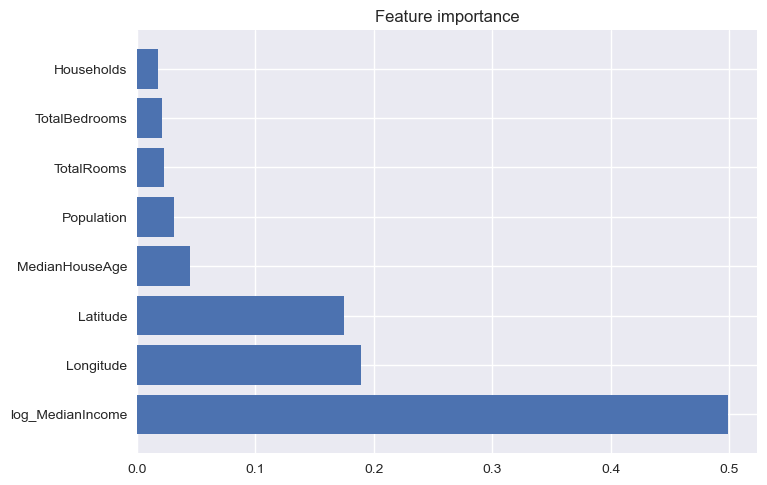

In [16]:
afx.plot_importance(modelo_forest, X_train.columns)

Recordemos que aqui solamente se interpreta que log_MedianIncome es importante!. Sin embargo, no se sabe CUAN importante es, y el sentido de esta importancia (se desconoce si aumenta o disminuye el precio de la casa :S)

- Con el hiperparametro n_estimators se cambia la cantidad de arboles a generar!

In [ ]:
modelo_mas_grande = RandomForestRegressor(n_estimators=10000, n_jobs=-1, )

n_estimators = range(1000, 10001, 1000)

for i in tqdm(n_estimators):
    none_regressor = RandomForestRegressor(n_estimators=i, max_features=None)
    sqrt_regressor = RandomForestRegressor(n_estimators=i, max_features='sqrt')
    log_regressor = RandomForestRegressor(n_estimators=i, max_features='log2')